<a href="https://colab.research.google.com/github/nverchev/BettingNetworks/blob/main/LinearModel/Betting_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/nverchev/BettingNetworks.git

Cloning into 'BettingNetworks'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 163 (delta 9), reused 19 (delta 5), pack-reused 133
Receiving objects: 100% (163/163), 76.77 MiB | 32.19 MiB/s, done.
Resolving deltas: 100% (59/59), done.


In [ ]:
%cd BettingNetworks
!git pull
%cd ..

/content/BettingNetworks
Updating 29d8f71..6cc9bd7
Fast-forward
 EfficientNet/trainer.py |  4 ++--
 LinearModel/trainer.py  | 12 ++++++------
 Utils/trainer.py        | 23 +++++++++++------------
 3 files changed, 19 insertions(+), 20 deletions(-)
/content


In [ ]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/content/BettingNetworks')
sys.path.append('/content/BettingNetworks/LinearModel')
import torch
import numpy as np
from torch.utils.data import Dataset
from dataset import get_dataset
from model import get_model
from trainer import get_trainer
from optimisation import get_opt
from Utils.Scheduling import CosineSchedule

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#@title Hyperparameters: { display-mode: "form" }
loss_name = "Naive"  # @param ["BCE", "MAE", "MSE", "Naive", "Betting", "CrossBet"]
classification = True  # @param {type: "boolean"}
noise_var = 0.5  # @param {type: "number"}
noise_data = noise_label = noise_var
num_weights = 64  # @param {type: "number"}
epochs = 60  # @param {type: "integer"}
batch_size = 64  # @param {type: "integer"}
opt = 'SGD'  # @param ['Adam', 'AdamW', 'SGD', 'SGD_nesterov']
initial_learning_rate = 0.001  # @param {type: "number"}
weight_decay = 0.0000  # @param {type: "number"}
exp_name = ''  # @param {type: "string"}
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
train_loader, test_loader = get_dataset(num_weights, batch_size, noise_data, \
                                        noise_label, classification)

optimizer, optim_args = get_opt(opt, initial_learning_rate, weight_decay)
block_args = {
    'optim_name': opt,
    'optim': optimizer,
    'optim_args': optim_args,
    'train_loader': train_loader,
    'device': device,
    'test_loader': test_loader,
    'batch_size': batch_size,
    'schedule': CosineSchedule()
}


In [ ]:
def test():
    accs, weights_errs = [], []
    for k, v in block_args.items():
      if not isinstance(v, (type, torch.utils.data.dataloader.DataLoader)):
          print(k, ': ', v)
    for _ in range(10):
        model = get_model(loss_name)(num_weights)
        trainer = get_trainer(model, loss_name, exp_name,  block_args)
        trainer.train(epochs)
        trainer.quiet_mode = True
        acc, weights_err = trainer.test(partition="test")
        accs.append(acc)
        weights_errs.append(weights_err.cpu())
    trainer.prob_analysis(partition='test')
    print(f"Overall acc: {np.array(accs).mean():.4f}") 
    print(f"Overall weight_err: {np.array(weights_errs).mean():.4f}") 

# BCE

## Noise: 0

optim_name :  SGD
optim_args :  {'weight_decay': 0.0, 'lr': 0.01}
device :  cuda:0
batch_size :  64
schedule :  CosineSchedule
====> Epoch:60


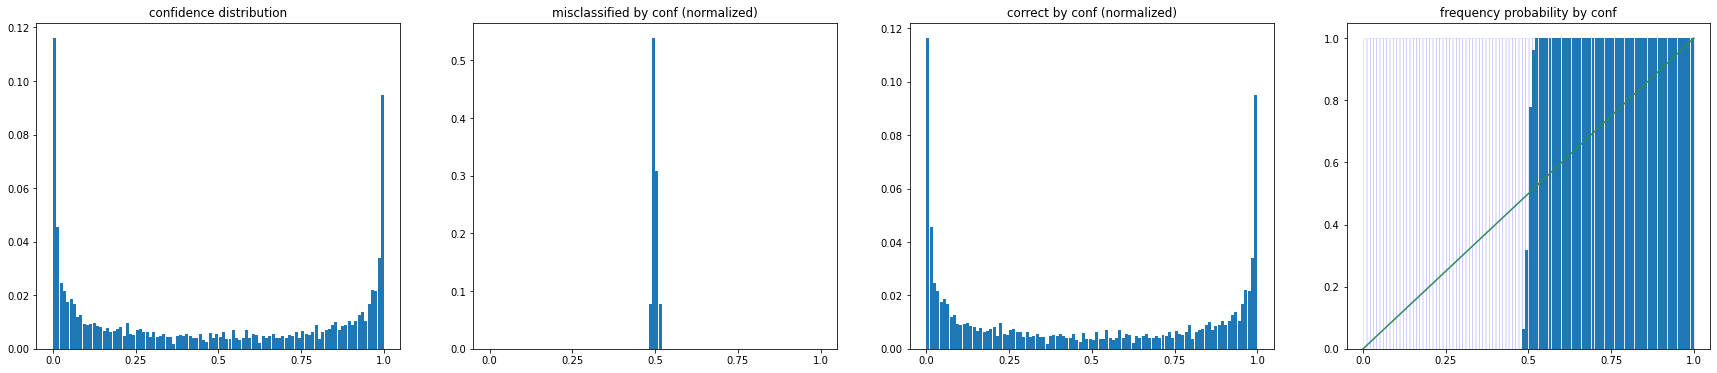

ECE:  0.24358634412288666
Brier Score: 0.43


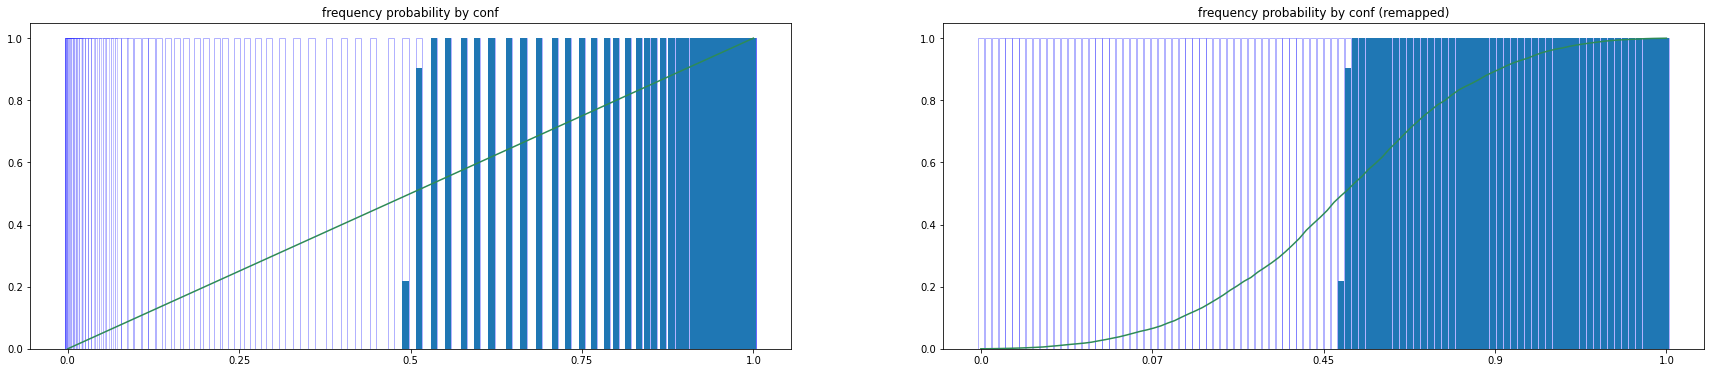

Quantile ECE:  0.13760890066623688
Overall acc: 0.9961
Overall weight_err: 0.0257


In [ ]:
test()

## Noise: 0.3

optim_name :  SGD
optim_args :  {'weight_decay': 0.0, 'lr': 0.01}
device :  cuda:0
batch_size :  64
schedule :  CosineSchedule
====> Epoch:60


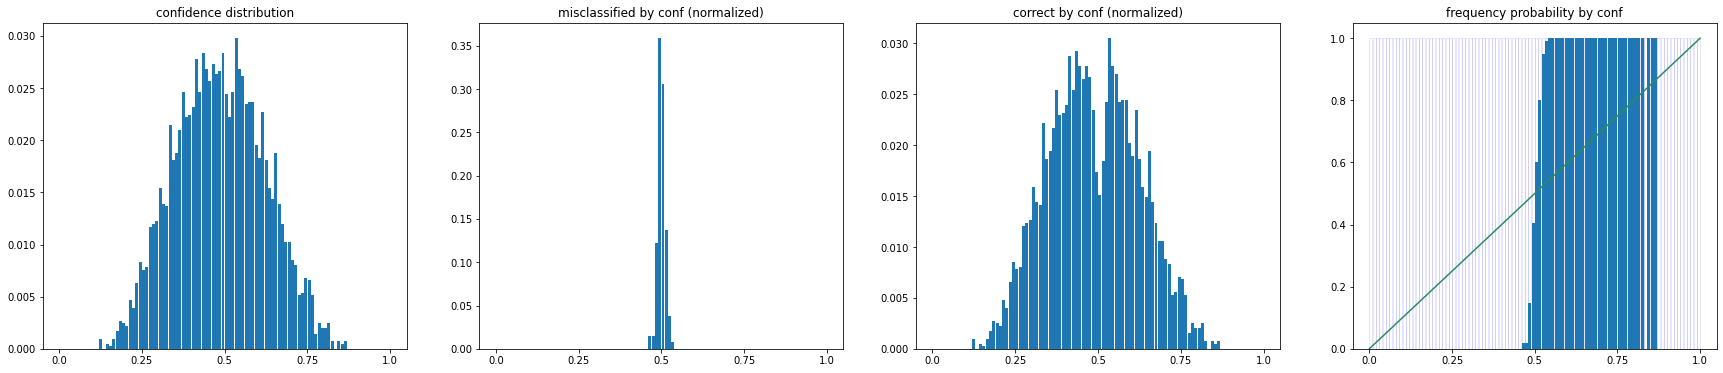

ECE:  0.2998788922749562
Brier Score: 0.28


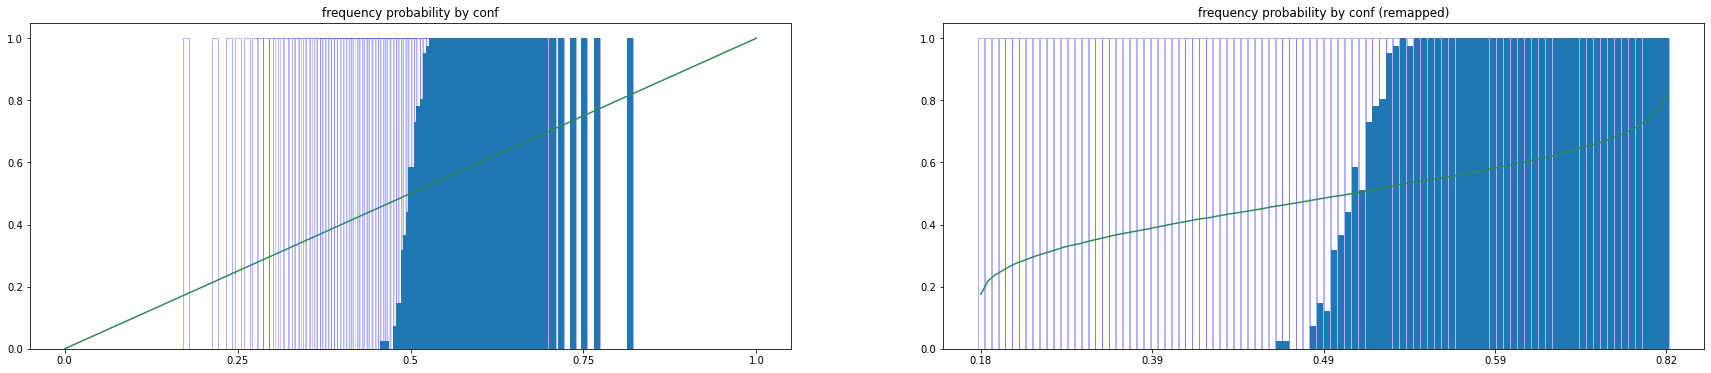

Quantile ECE:  0.3569893538951874
Overall acc: 0.9696
Overall weight_err: 2.6243


In [ ]:
test()

## Noise: 0.5

optim_name :  SGD
optim_args :  {'weight_decay': 0.0, 'lr': 0.01}
device :  cuda:0
batch_size :  64
schedule :  CosineSchedule
====> Epoch:60


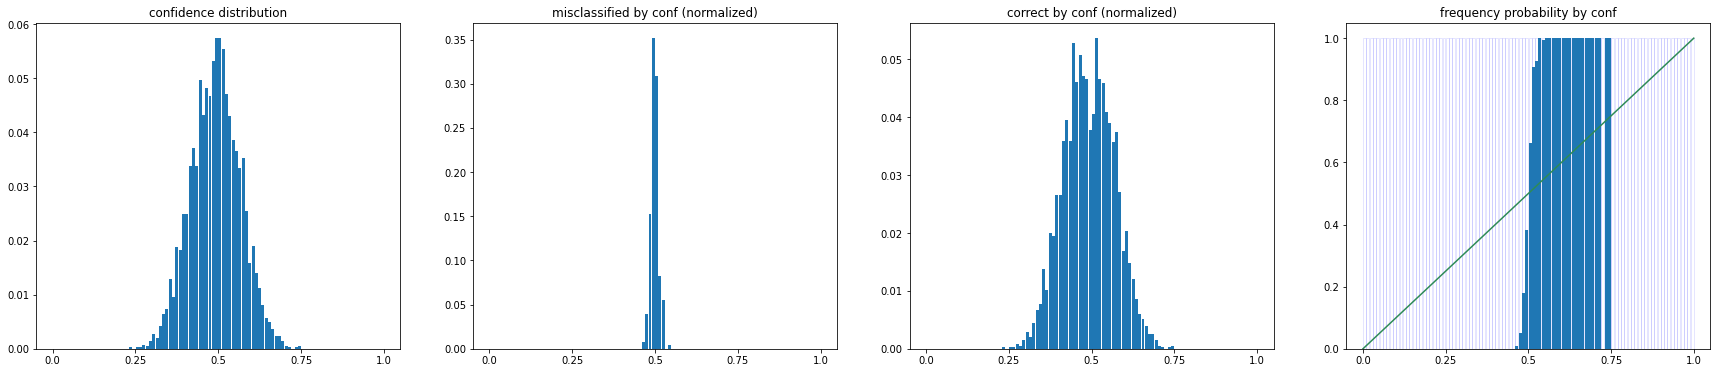

ECE:  0.35156129425466054
Brier Score: 0.26


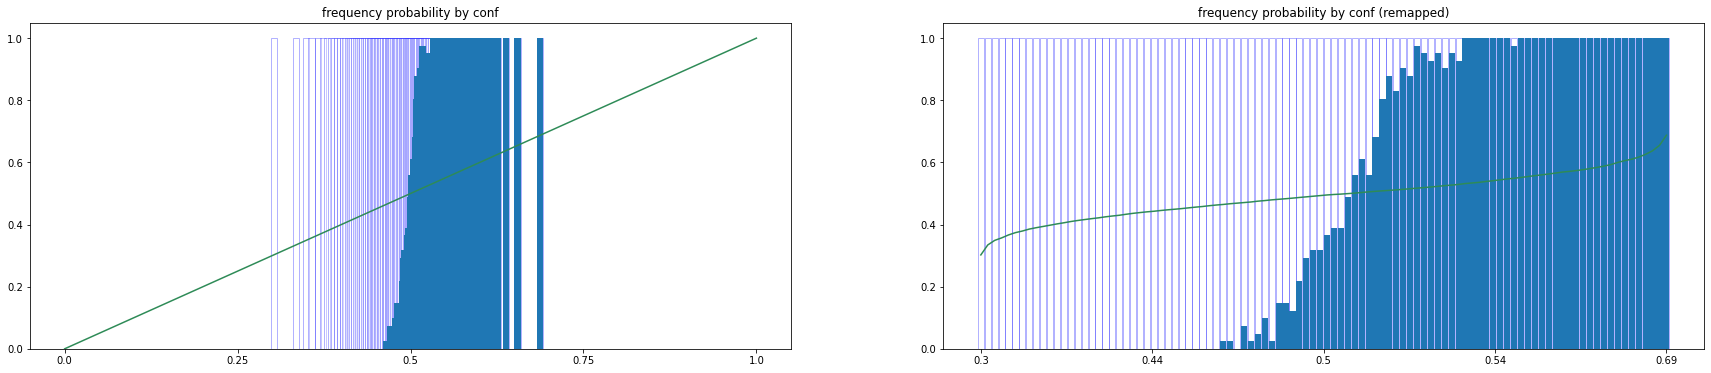

Quantile ECE:  0.3781968057155609
Overall acc: 0.9435
Overall weight_err: 10.2959


In [ ]:
test()

## Betting

## Noise: 0

optim_name :  SGD
optim_args :  {'weight_decay': 0.0, 'lr': 0.001}
device :  cuda:0
batch_size :  64
schedule :  CosineSchedule
====> Epoch:60


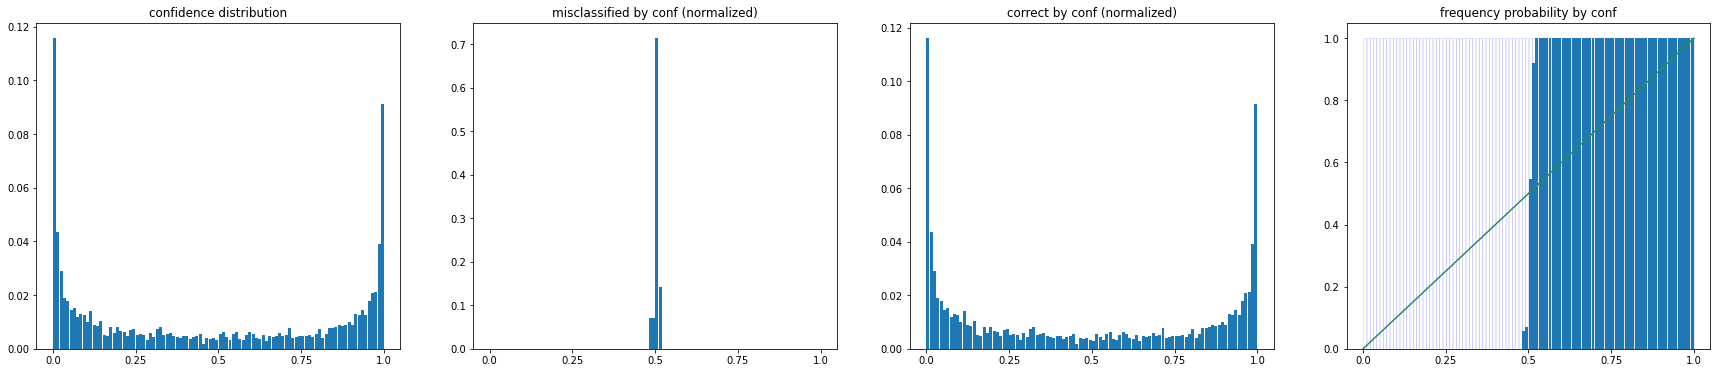

ECE:  0.2433520247414708
Brier Score: 0.43


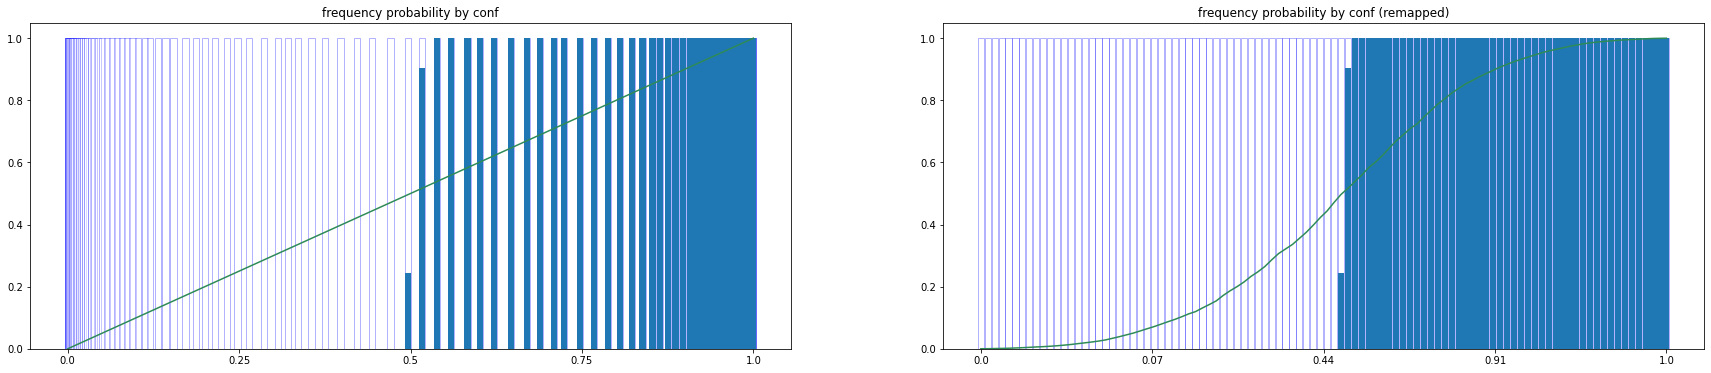

Quantile ECE:  0.13681113719940186
Overall acc: 0.9970
Overall weight_err: 0.0270


In [ ]:
test()

## Noise: 0.3

optim_name :  SGD
optim_args :  {'weight_decay': 0.0, 'lr': 0.001}
device :  cuda:0
batch_size :  64
schedule :  CosineSchedule
====> Epoch:60


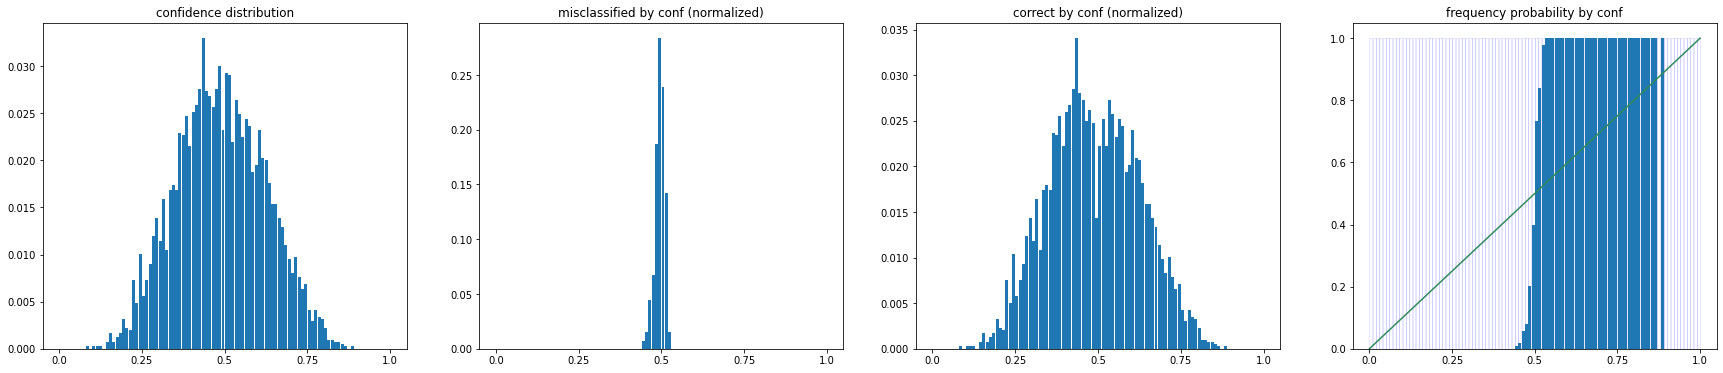

ECE:  0.28851661494765907
Brier Score: 0.28


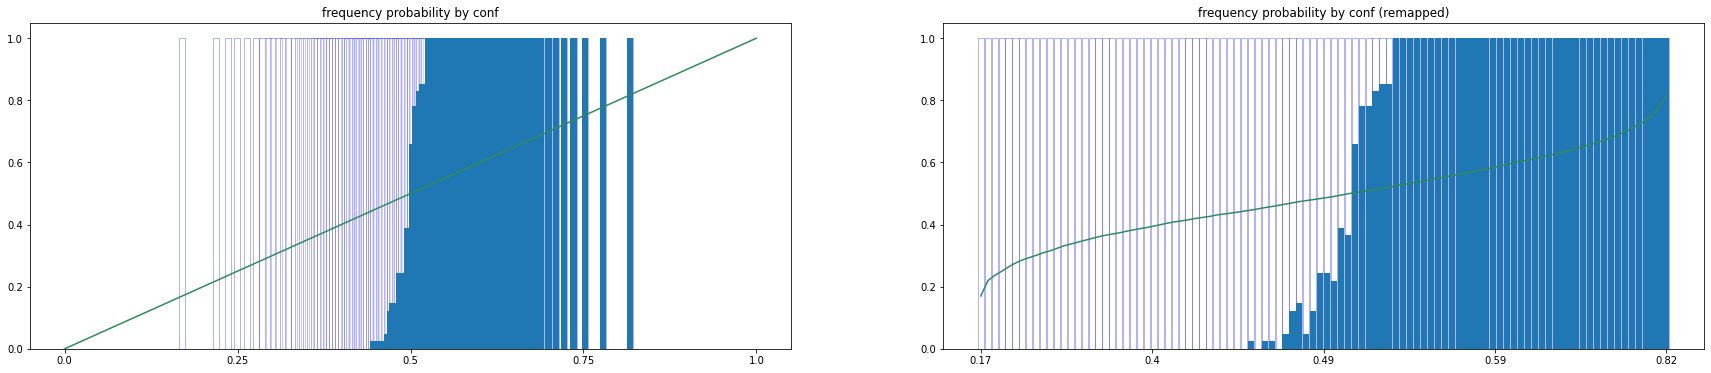

Quantile ECE:  0.3569202423095703
Overall acc: 0.9672
Overall weight_err: 2.6122


In [ ]:
test()

## Noise : 0.5

optim_name :  SGD
optim_args :  {'weight_decay': 0.0, 'lr': 0.001}
device :  cuda:0
batch_size :  64
schedule :  CosineSchedule
====> Epoch:60


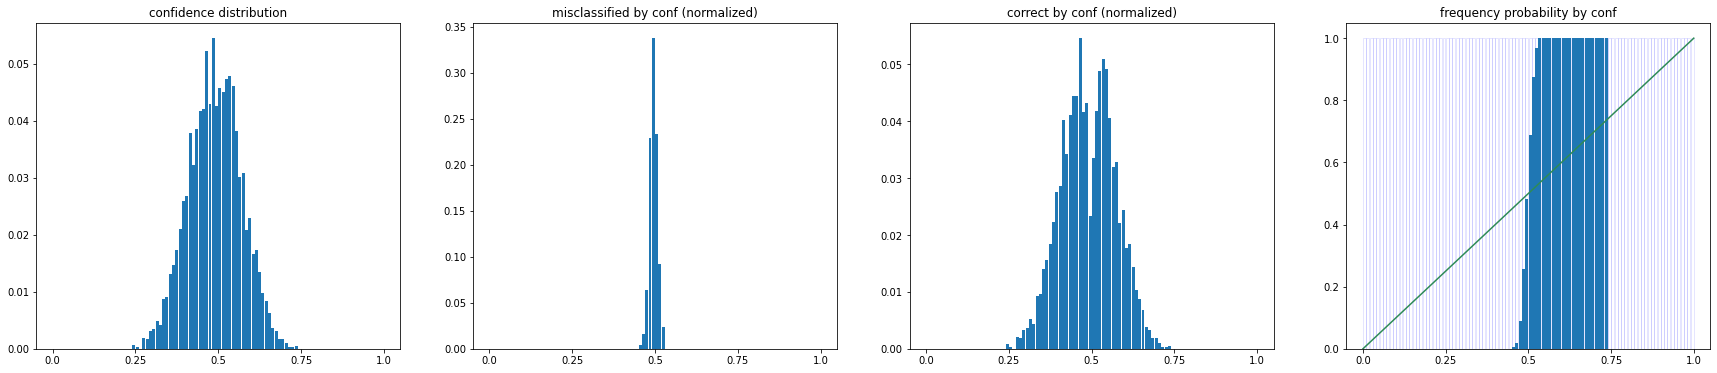

ECE:  0.35010475812441844
Brier Score: 0.27


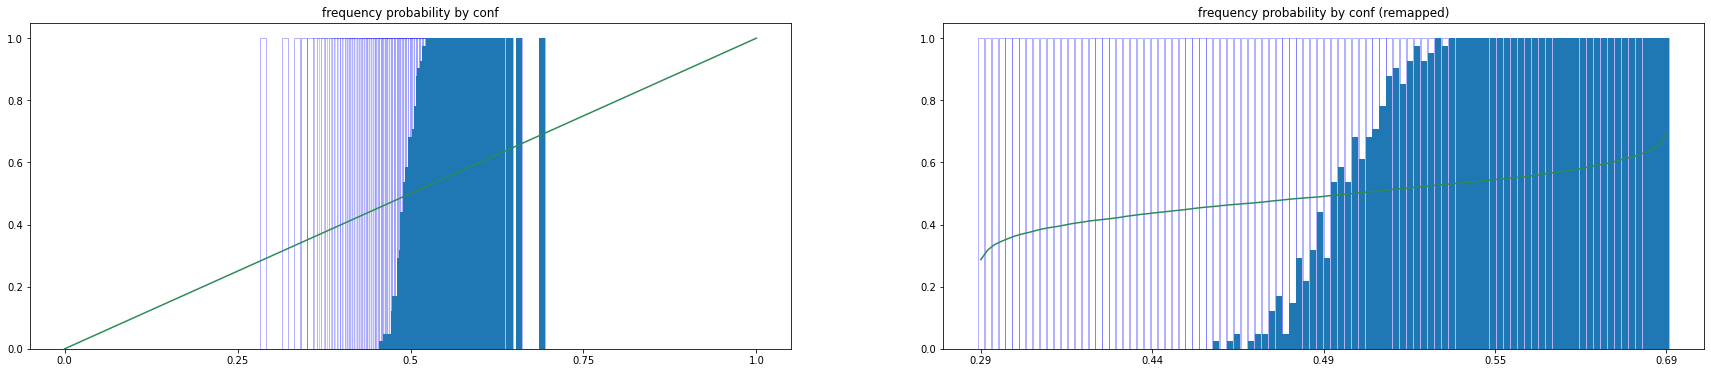

Quantile ECE:  0.3785508871078491
Overall acc: 0.9321
Overall weight_err: 9.7234


In [ ]:
test()

# MSE

## Noise: 0

optim_name :  SGD
optim_args :  {'weight_decay': 0.0, 'lr': 0.001}
device :  cuda:0
batch_size :  64
schedule :  CosineSchedule
====> Epoch:60


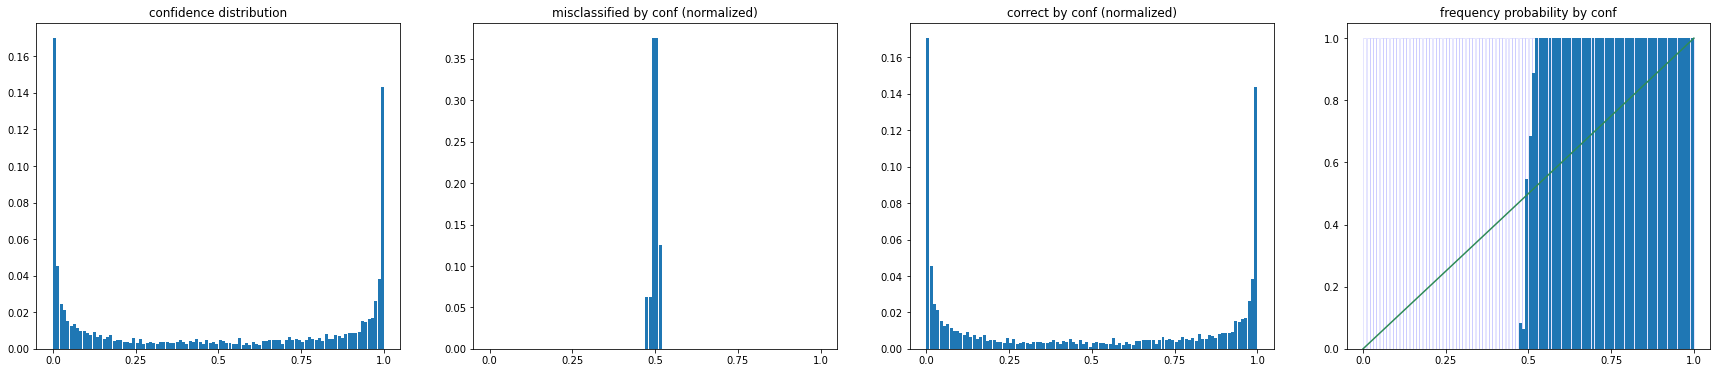

ECE:  0.23982720660269258
Brier Score: 0.43


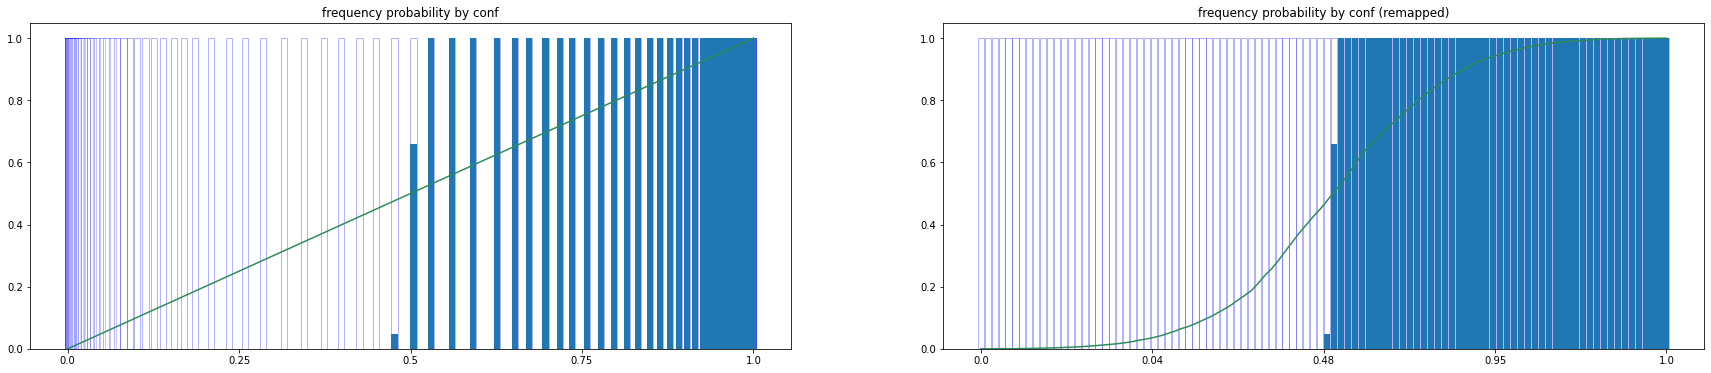

Quantile ECE:  0.11037646234035492
Overall acc: 0.9968
Overall weight_err: 0.0101


In [ ]:
test()

## Noise: 0.3

optim_name :  SGD
optim_args :  {'weight_decay': 0.0, 'lr': 0.001}
device :  cuda:0
batch_size :  64
schedule :  CosineSchedule
====> Epoch:60


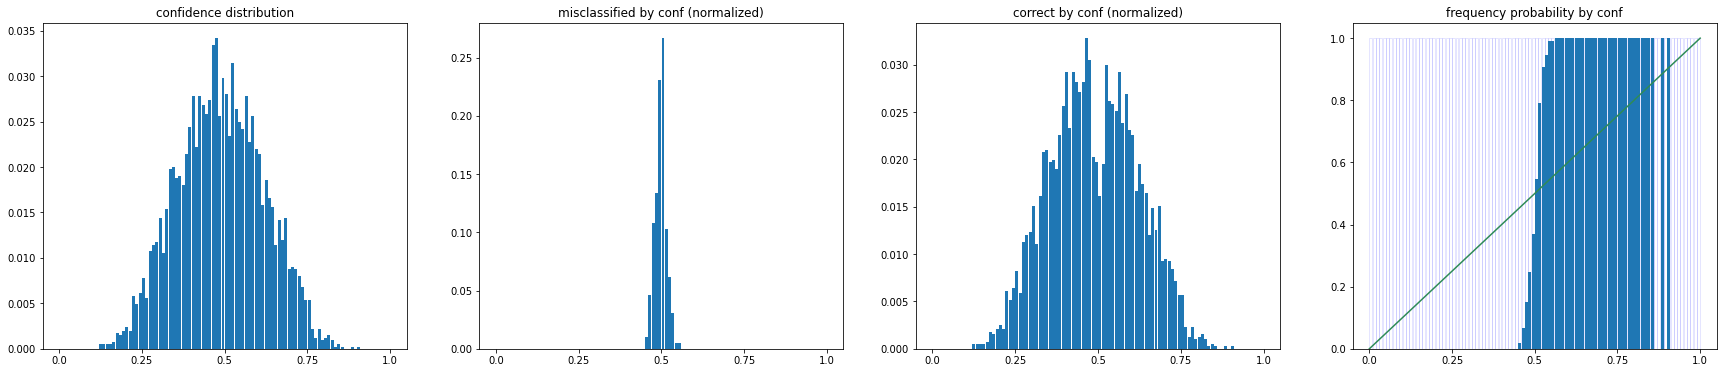

ECE:  0.28724982776041874
Brier Score: 0.28


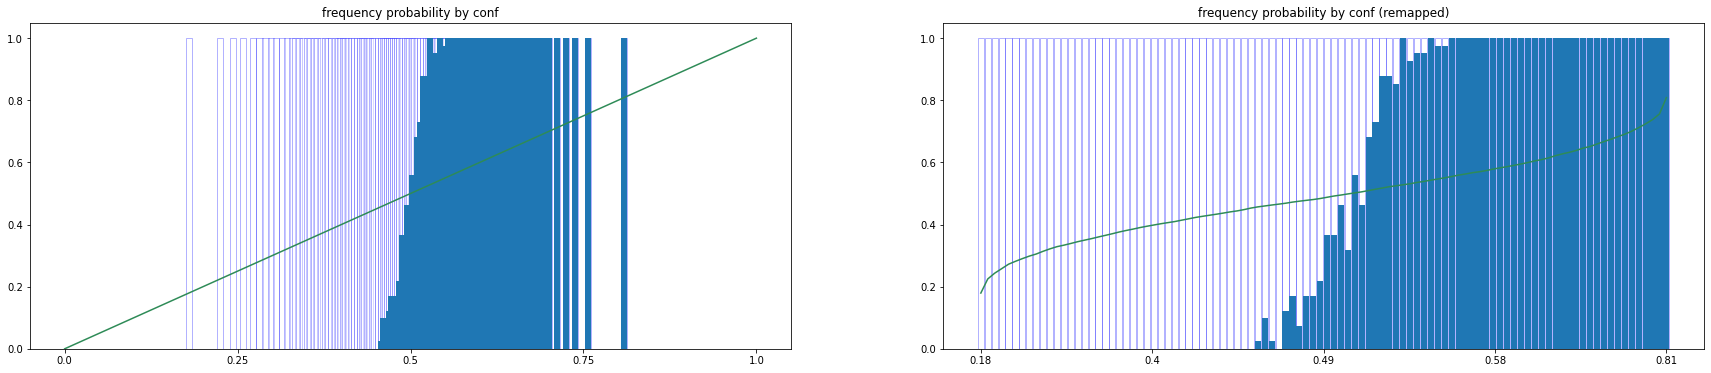

Quantile ECE:  0.3470058739185333
Overall acc: 0.9511
Overall weight_err: 2.6276


In [ ]:
test()

## Noise: 0.5

optim_name :  SGD
optim_args :  {'weight_decay': 0.0, 'lr': 0.001}
device :  cuda:0
batch_size :  64
schedule :  CosineSchedule
====> Epoch:60


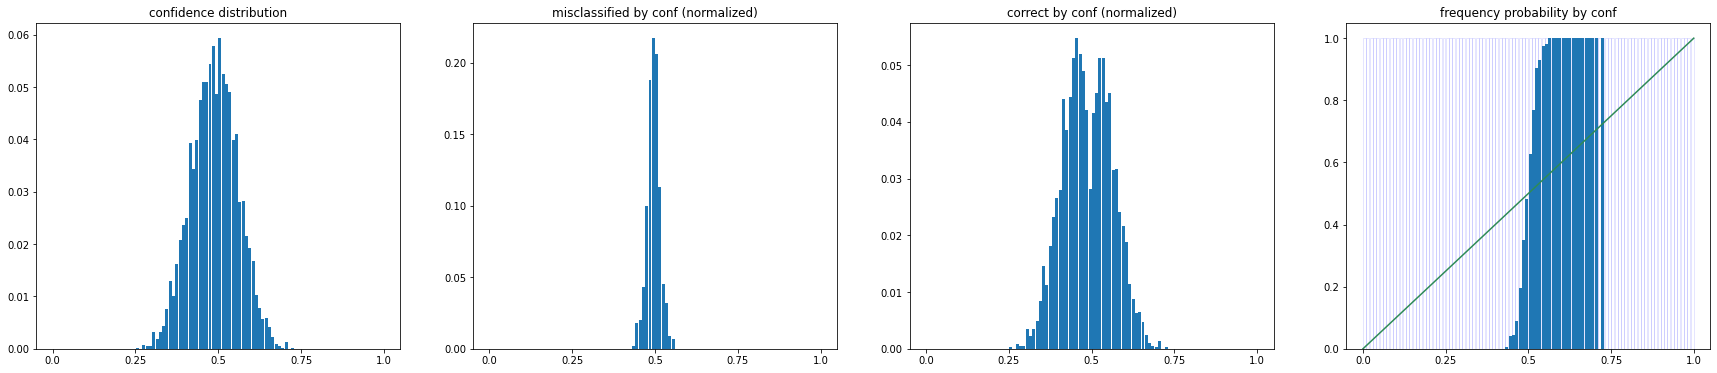

ECE:  0.3402874955526836
Brier Score: 0.27


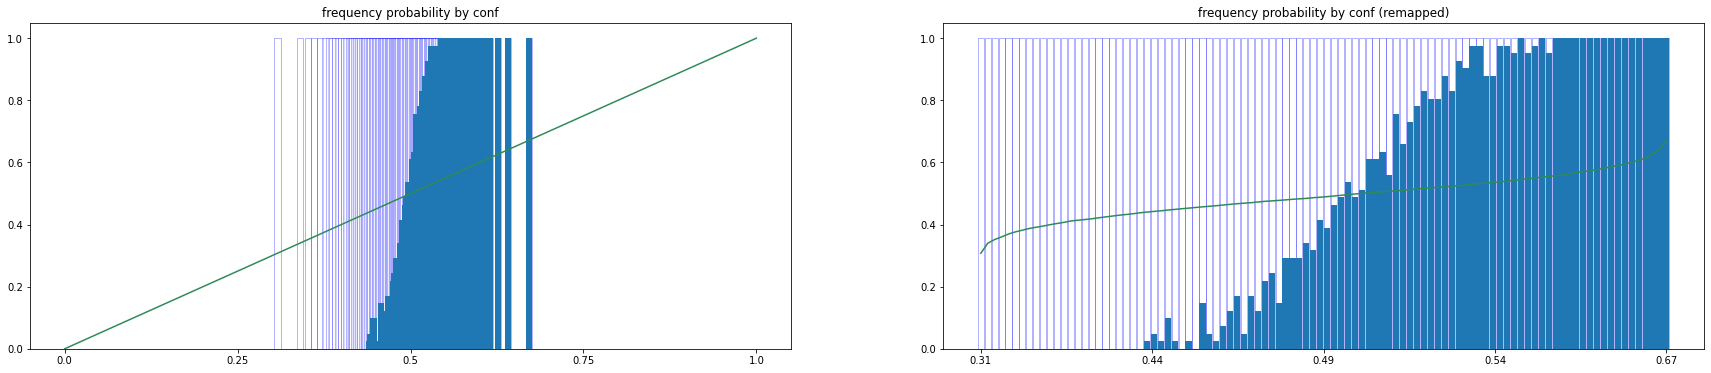

Quantile ECE:  0.33608636260032654
Overall acc: 0.9072
Overall weight_err: 9.9855


In [ ]:
test()

## MAE

## Noise: 0

optim_name :  SGD
optim_args :  {'weight_decay': 0.0, 'lr': 0.001}
device :  cuda:0
batch_size :  64
schedule :  CosineSchedule
====> Epoch:60


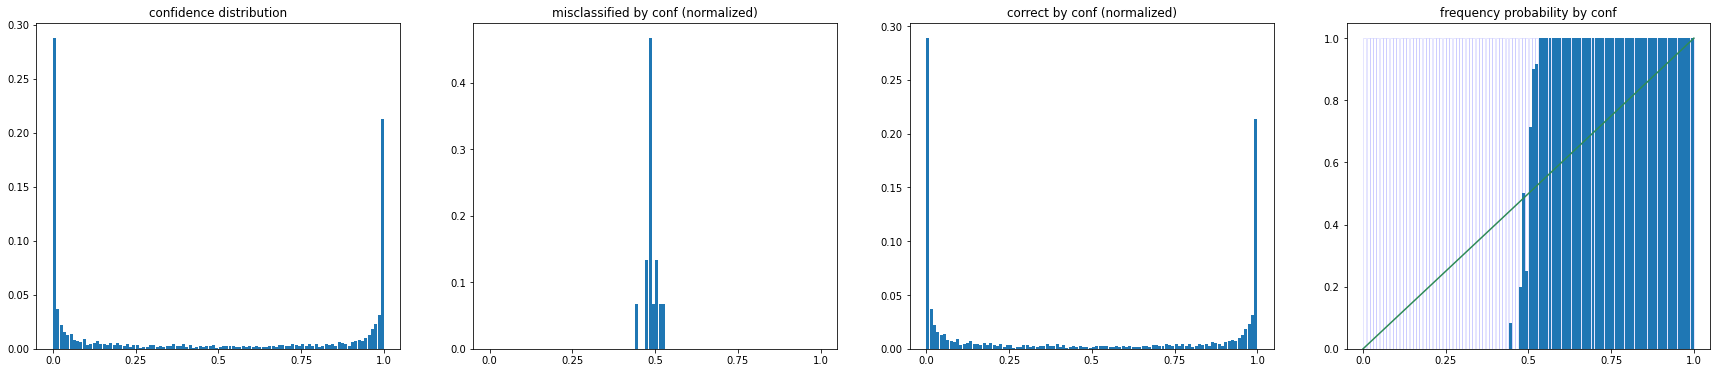

ECE:  0.23527619055211546
Brier Score: 0.49


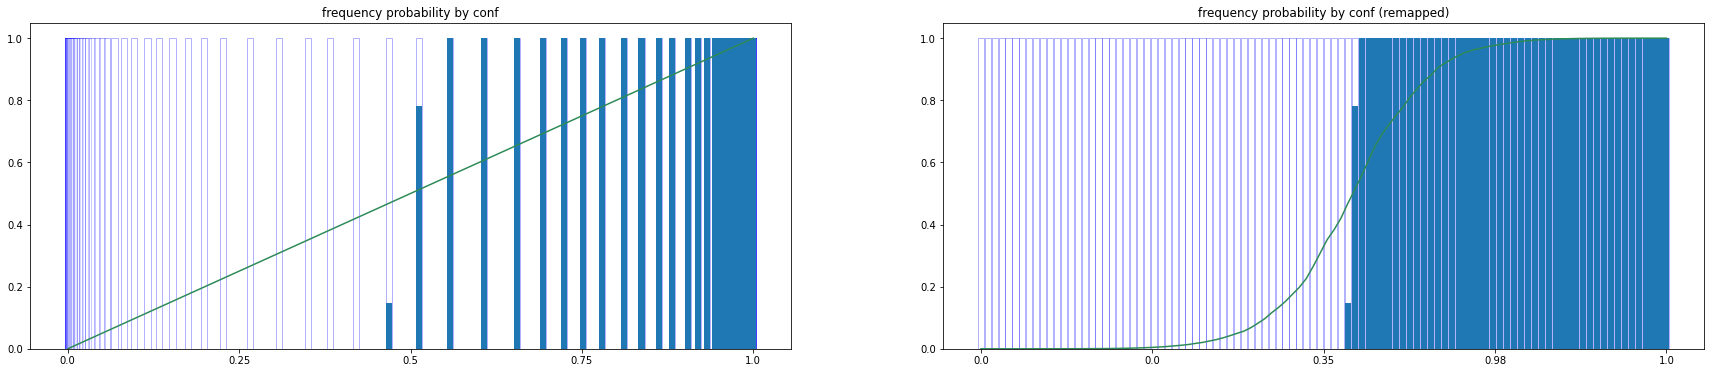

Quantile ECE:  0.0731460452079773
Overall acc: 0.9959
Overall weight_err: 0.0008


In [ ]:
test()

## Noise: 0.3

optim_name :  SGD
optim_args :  {'weight_decay': 0.0, 'lr': 0.001}
device :  cuda:0
batch_size :  64
schedule :  CosineSchedule
====> Epoch:60


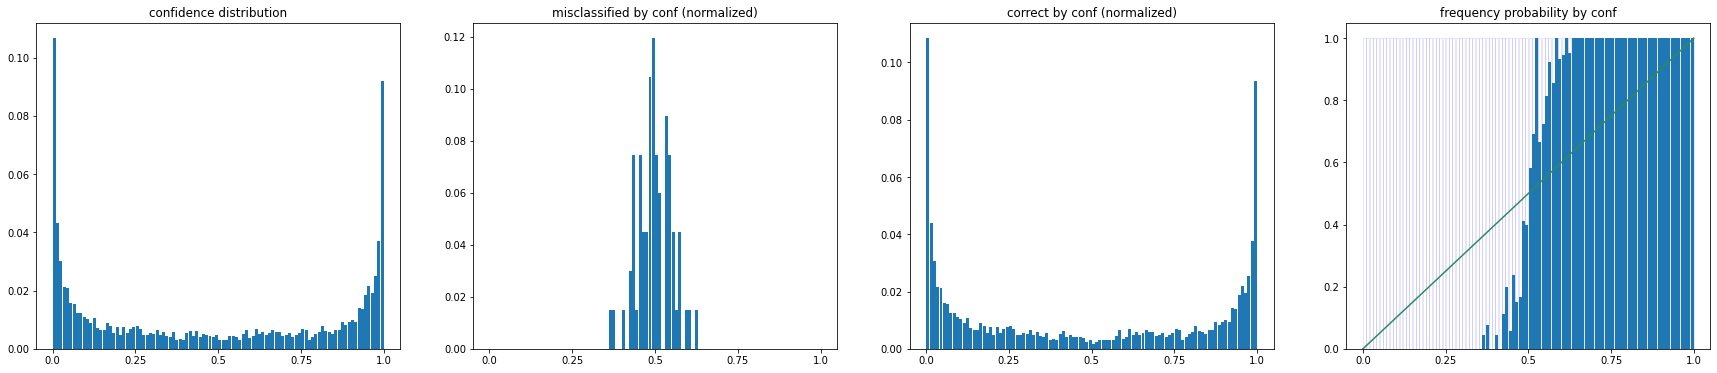

ECE:  0.21185091257095337
Brier Score: 0.42


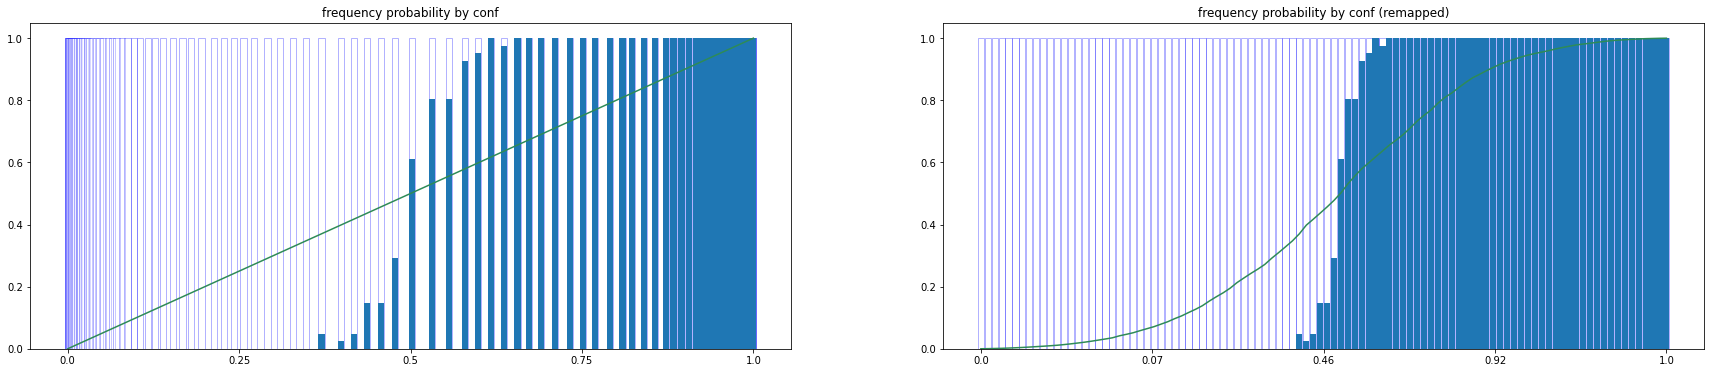

Quantile ECE:  0.12434983253479004
Overall acc: 0.9771
Overall weight_err: 0.0255


In [ ]:
test()

## Noise: 0.5

optim_name :  SGD
optim_args :  {'weight_decay': 0.0, 'lr': 0.001}
device :  cuda:0
batch_size :  64
schedule :  CosineSchedule
====> Epoch:60


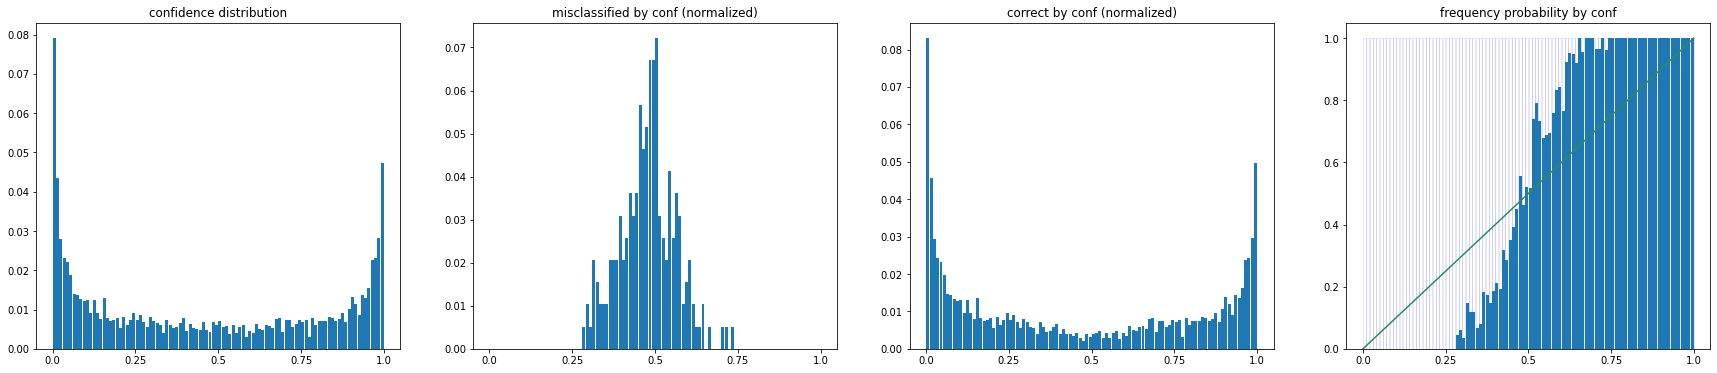

ECE:  0.16748817813992495
Brier Score: 0.42


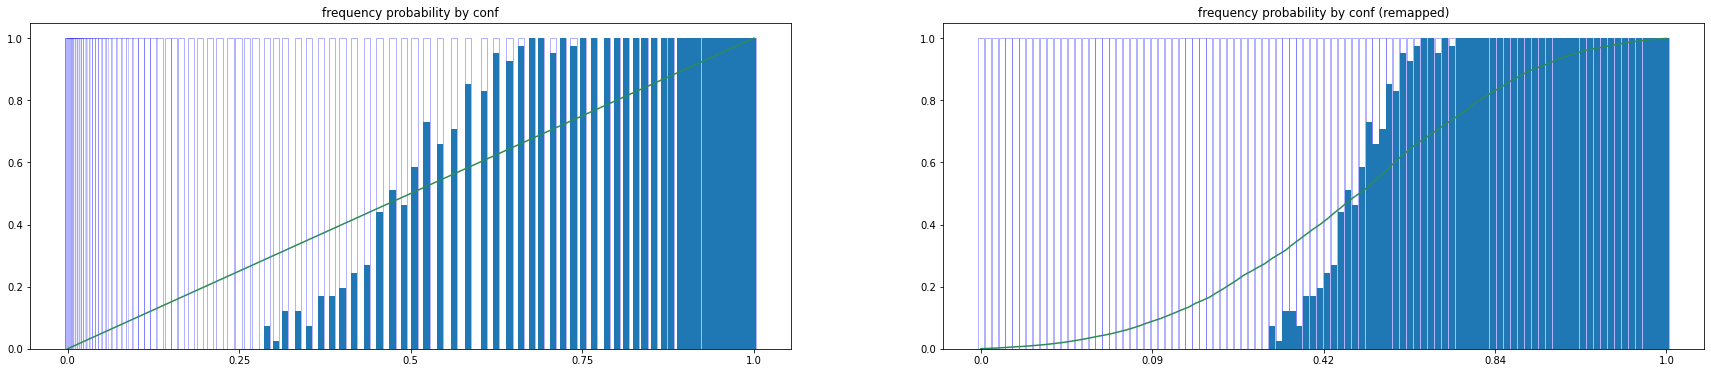

Quantile ECE:  0.11911769211292267
Overall acc: 0.9624
Overall weight_err: 0.0510


In [ ]:
test()

# Naive

## Noise: 0

optim_name :  SGD
optim_args :  {'weight_decay': 0.0, 'lr': 0.001}
device :  cuda:0
batch_size :  64
schedule :  CosineSchedule
====> Epoch:60


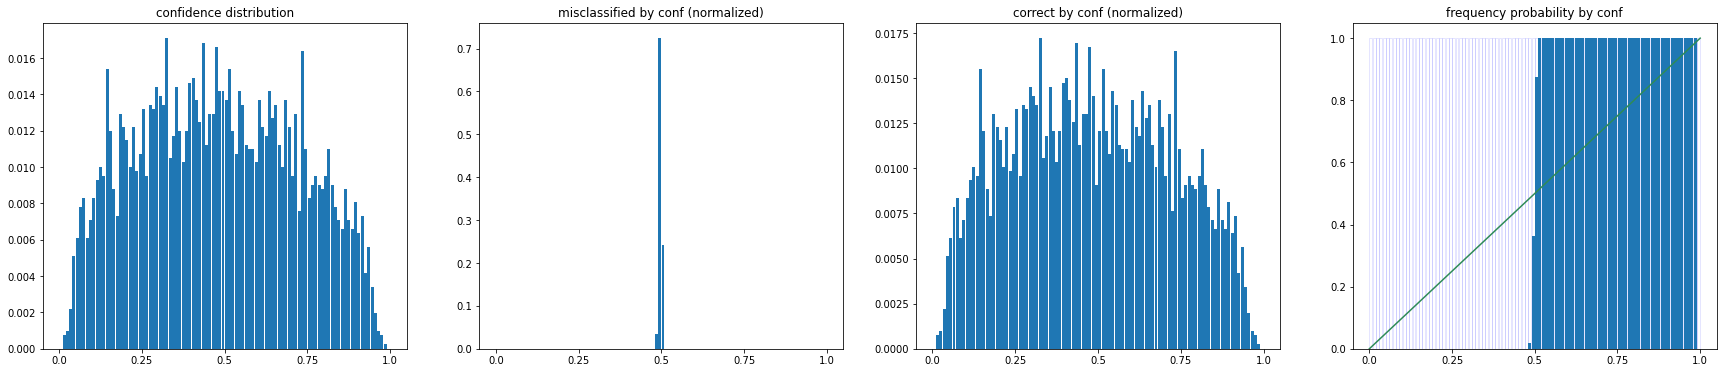

ECE:  0.24985397622065275
Brier Score: 0.33


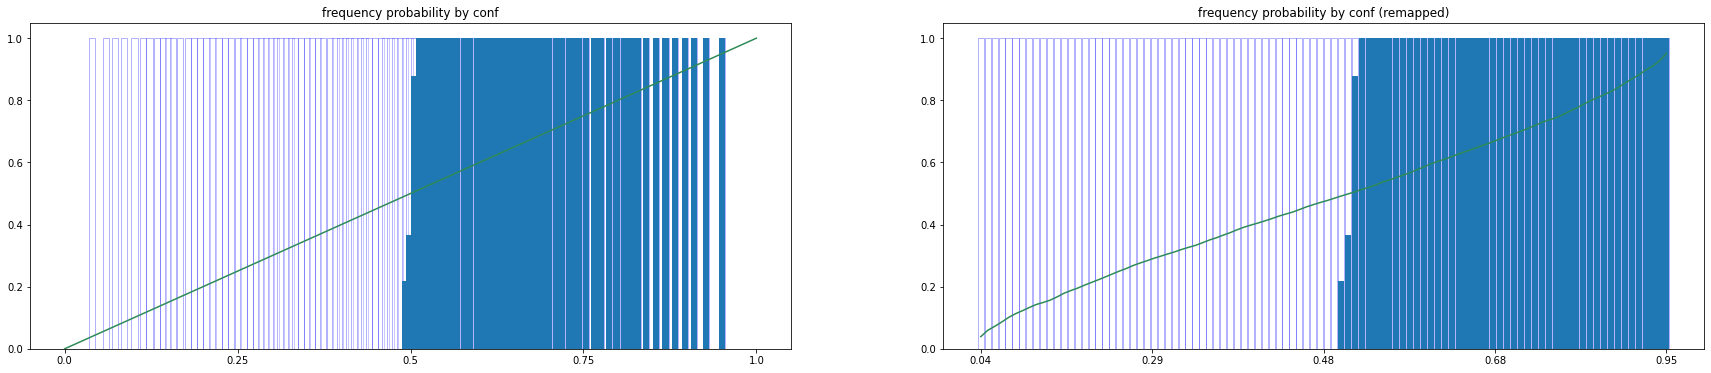

Quantile ECE:  0.28972357511520386
Overall acc: 0.9925
Overall weight_err: 0.5114


In [ ]:
test()

## Noise: 0.3

optim_name :  SGD
optim_args :  {'weight_decay': 0.0, 'lr': 0.001}
device :  cuda:0
batch_size :  64
schedule :  CosineSchedule
====> Epoch:60


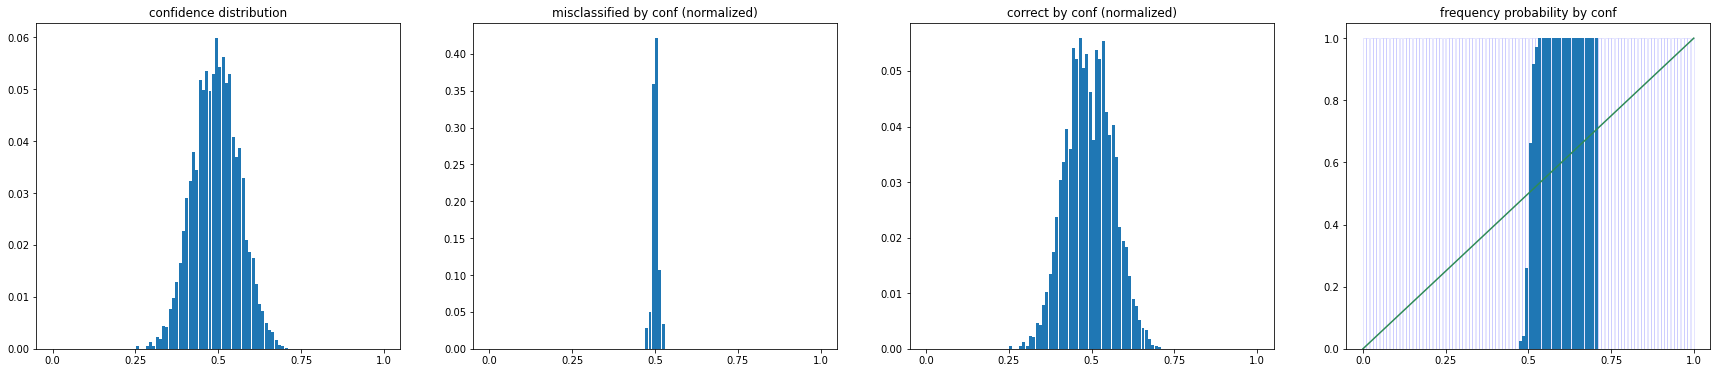

ECE:  0.37167391780255876
Brier Score: 0.26


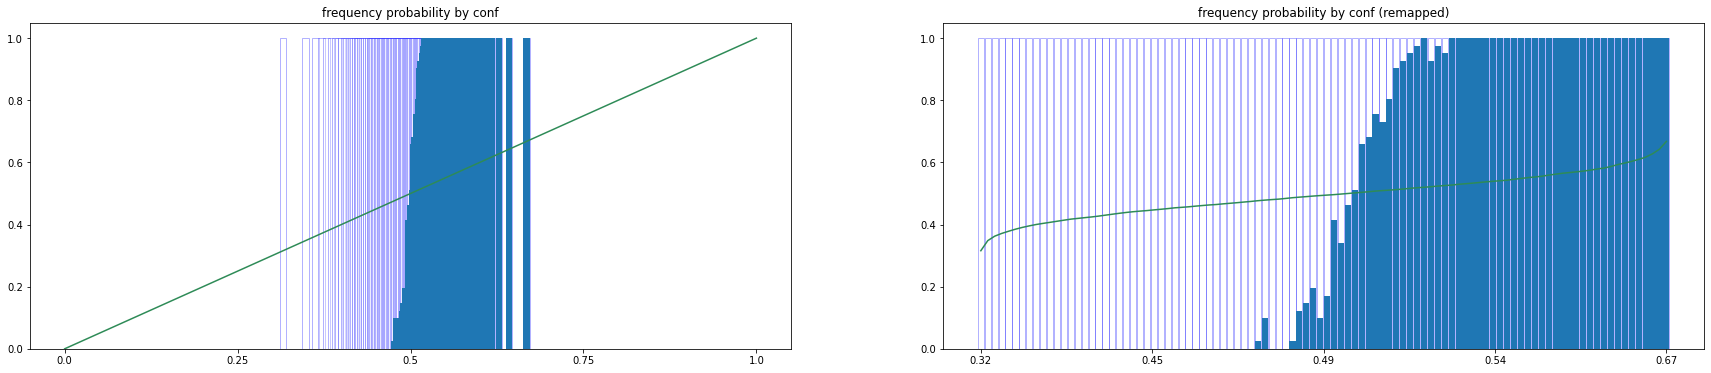

Quantile ECE:  0.4013438820838928
Overall acc: 0.9471
Overall weight_err: 12.5514


In [ ]:
test()

## Noise: 0.5

optim_name :  SGD
optim_args :  {'weight_decay': 0.0, 'lr': 0.001}
device :  cuda:0
batch_size :  64
schedule :  CosineSchedule
====> Epoch:60


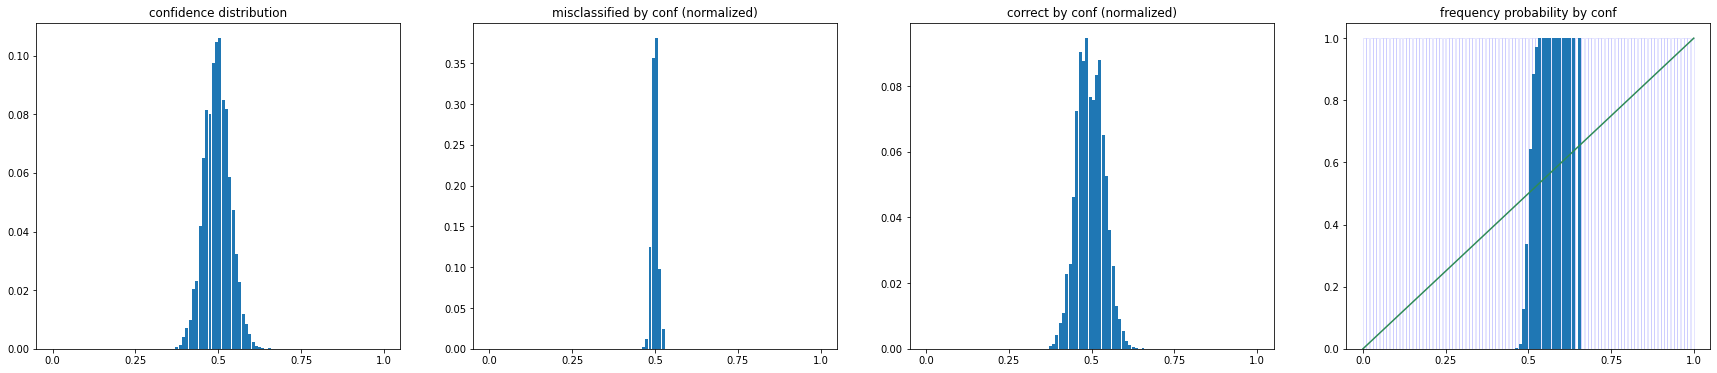

ECE:  0.3940550320542285
Brier Score: 0.25


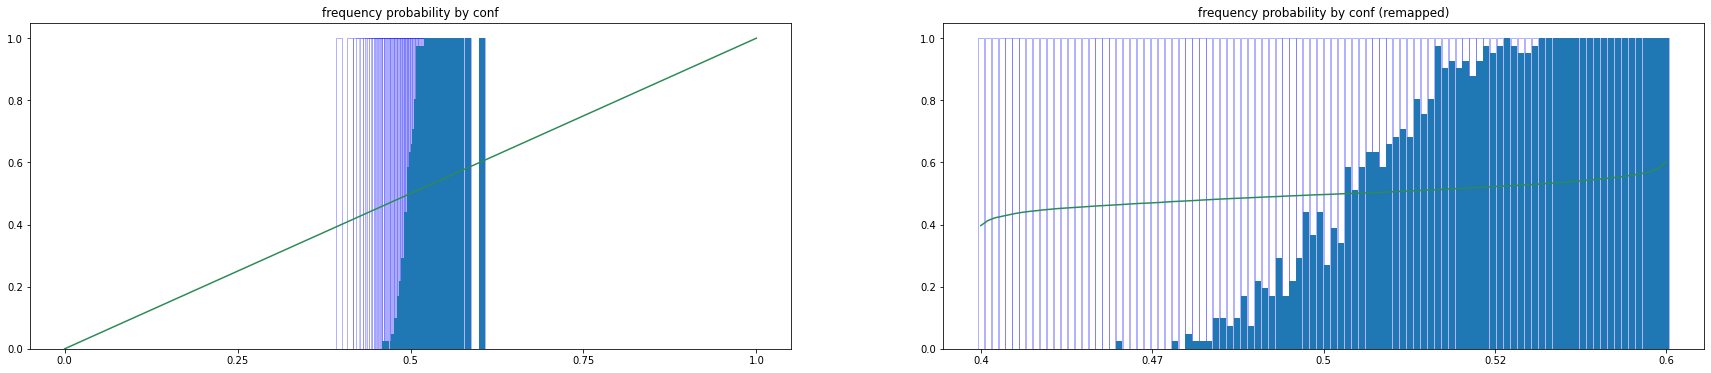

Quantile ECE:  0.37156251072883606
Overall acc: 0.9052
Overall weight_err: 42.1311


In [ ]:
test()

## Noise: 0

## Noise: 0.3

## Noise: 0.5